### Data cleaning and exploration

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

In [11]:
dataset = 'Data/Animal Dataset.csv'
df_animals =  pd.read_csv(dataset, header=0)

In [12]:
df_animals.head()

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12


In [ ]:
df_animals.shape

(205, 16)

##### Checking for the different types in the dataset

In [ ]:
df_animals.dtypes

Animal                     object
Height (cm)                object
Weight (kg)                object
Color                      object
Lifespan (years)           object
Diet                       object
Habitat                    object
Predators                  object
Average Speed (km/h)       object
Countries Found            object
Conservation Status        object
Family                     object
Gestation Period (days)    object
Top Speed (km/h)           object
Social Structure           object
Offspring per Birth        object
dtype: object

##### Checking for null/missing values

In [ ]:
df_animals.isna().sum()

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Habitat                    0
Predators                  0
Average Speed (km/h)       0
Countries Found            0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
dtype: int64

In [13]:
columns_to_keeo = [
    "Animal",
    "Height (cm)",
    "Weight (kg)",
    "Lifespan (years)",
    "Diet",
    "Habitat",
    "Average Speed (km/h)",
    "Countries Found",
    "Conservation Status",
    "Gestation Period (days)",
    "Social Structure",
    "Offspring per Birth"
]

df_animals = df_animals[columns_to_keeo]

##### Cleaning all values with "-", and changing from int to a float. 

In [16]:
def parse_range(val):
    if isinstance(val, str): # is this a string? if yes continue cleaning.
        val = re.sub(r"\(.*?\)", "", val) # removes anything in parenthesis. 
        val = val.strip() # removes the spaces after it. 

        # Checking for range, first for an "en dash" and second for a normal hyphen-minus
        if "–" in val: 
            try:
                low, high = val.split("–")
                return (float(low.strip()) + float(high.strip())) / 2
            except:
                return np.nan
        elif "-" in val:
            try: 
                low, high = val.split("-")
                return (float(low.strip()) + float(high.strip())) / 2
            except:
                return np.nan
            
        else: # for single values.
            try:
                return float(val.strip())
            except:
                return np.nan
    elif isinstance(val, (int, float)):
        return float(val)
    else:
        return np.nan



In [17]:
# applying my function to the needed columns that has a range. 

columns_with_range = [
    "Height (cm)",
    "Weight (kg)",
    "Lifespan (years)",
    "Average Speed (km/h)",
    "Gestation Period (days)",
    "Offspring per Birth"
]

for col in columns_with_range:
    df_animals[col] = df_animals[col].apply(parse_range)

In [ ]:
df_animals.head() # checking to see if the function did as it was supposed to. 

,Animal,Height (cm),Weight (kg),Lifespan (years),Diet,Habitat,Average Speed (km/h),Countries Found,Conservation Status,Gestation Period (days),Social Structure,Offspring per Birth
0,Aardvark,117.5,52.5,25.0,Insectivore,"Savannas, Grasslands",40.0,Africa,Least Concern,225.0,Solitary,1.0
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5
2,African Elephant,290.0,4350.0,65.0,Herbivore,"Savannah, Forest",25.0,Africa,Vulnerable,650.0,Herd-based,1.0
3,African Lion,95.0,185.0,12.0,Carnivore,"Grasslands, Savannas",58.0,Africa,Vulnerable,101.5,Group-based,3.0
4,African Wild Dog,77.5,27.0,11.0,Carnivore,Savannahs,56.0,Sub-Saharan Africa,Endangered,70.0,Group-based,11.0


##### Checking the different countries, getting to learn if its by region, or specific country.

In [19]:
df_animals["Countries Found"].unique()


array(['Africa', 'Eastern and Southern Africa', 'Sub-Saharan Africa',
       'European Alps', 'Amazon Rainforest', 'North America',
       'Central and South America', 'Middle East, North Africa',
       'Middle East', 'Arctic regions', 'South America, Asia',
       'Asia (Southeast)', 'North Atlantic, Arctic', 'Worldwide',
       'Australia, New Zealand', 'Mexico', 'Madagascar',
       'Southeast Asia, South Asia',
       'Gibraltar, North Africa, Middle East', 'Australia',
       'India, Nepal, Bhutan', 'India, Bangladesh, Nepal',
       'Australia, New Zealand, Tasmania', 'Deep-sea regions',
       'Oceans worldwide', 'Eastern Pacific (GalÃ¡pagos Islands)',
       'Indo-Pacific region', 'Democratic Republic of Congo', 'Borneo',
       'South and Central America', 'North America, Europe, Asia',
       'Southeast Asia, South Asia, Indonesia', 'South America',
       'Africa, Iran, India', 'Central and West Africa', 'China',
       'Indian, Pacific Oceans', 'Western Indian Ocean', 'Asi

##### Since this animal dataset has only regions but the climate dataset has specific countries, I have created a region-to-country-mapping, to be able to merge the two datasets later.


In [ ]:
region_map = {
    "Africa" : ["Africa_full_region"],
    "Sub-Saharan Africa": ["Kenya", "Uganda", "Ethiopia", "Nigeria", "South Africa", "Tanzania", "Zambia", "Rwanda", "Malawi", "Mozambique"],
    "Eastern and Southern Africa": ["Kenya", "Tanzania", "Uganda", "South Africa", "Zimbabwe", "Mozambique", "Botswana"],
    "North America": ["United States of America", "Canada", "Mexico"],
    "South America": ["Brazil", "Argentina", "Peru", "Colombia", "Chile", "Ecuador", "Venezuela", "Paraguay", "Bolivia"],
    "Amazon Rainforest": ["Brazil", "Colombia", "Peru", "Ecuador", "Bolivia"],
    "Europe": ["France", "Germany", "Spain", "Italy", "Sweden", "Norway", "Poland", "Denmark", "Portugal", "Netherlands", "Finland", "Romania", "Belgium"],
    "Middle East": ["Saudi Arabia", "United Arab Emirates", "Qatar", "Jordan", "Iraq", "Iran", "Syria", "Lebanon", "Israel"],
    "North Africa": ["Egypt", "Morocco", "Algeria", "Tunisia", "Libya"],
    "Central and West Africa": ["Nigeria", "Ghana", "Cameroon", "Ivory Coast", "Senegal", "Chad", "Benin", "Togo"],
    "South Asia": ["India", "Pakistan", "Bangladesh", "Nepal", "Sri Lanka", "Bhutan"],
    "Southeast Asia": ["Indonesia", "Thailand", "Vietnam", "Malaysia", "Cambodia", "Laos", "Myanmar", "Philippines", "Singapore"],
    "Asia": ["China", "India", "Japan", "South Korea", "Vietnam", "Pakistan", "Bangladesh", "Nepal"],
    "Asia (Southeast)": ["Indonesia", "Thailand", "Philippines", "Vietnam", "Malaysia"],
    "Australia, New Zealand": ["Australia", "New Zealand"],
    "Australia, New Zealand, Tasmania": ["Australia", "New Zealand"],
    "Australia, New Guinea": ["Australia", "Papua New Guinea"],
    "Oceania": ["Australia", "New Zealand", "Papua New Guinea", "Fiji", "Samoa", "Tonga"],
    "Central and South America": ["Brazil", "Colombia", "Peru", "Ecuador", "Argentina", "Chile", "Venezuela", "Paraguay", "Bolivia"],
    "Antarctica": ["French Southern and Antarctic Lands (Fr.)"],
    "Arctic": ["Greenland", "Canada", "Norway", "Iceland", "Russia"],
    "Arctic regions": ["Greenland", "Canada", "Norway", "Russia"],
    "Indian subcontinent": ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal", "Bhutan"],
    "Indian Ocean": ["Madagascar", "Seychelles", "Mauritius", "Comoros", "Maldives"],
    "Pacific Ocean": ["Fiji", "Vanuatu", "Tonga", "Micronesia", "Marshall Islands"],
    "Indian Ocean, Western Pacific": ["Indonesia", "Malaysia", "Australia", "Papua New Guinea"],
    "North Atlantic, Arctic": ["Greenland", "Iceland", "Canada"],
    "Eastern Africa": ["Kenya", "Ethiopia", "Tanzania", "Somalia", "Rwanda"],
    "Western Indian Ocean": ["Seychelles", "Comoros", "Madagascar", "Mauritius"],
    "Eastern Pacific (Galápagos Islands)": ["Ecuador"],
    "Galápagos Islands": ["Ecuador"],
    "South and Central America": ["Brazil", "Colombia", "Peru", "Panama", "Costa Rica"],
    "Indian, Pacific Oceans": ["Indonesia", "Malaysia", "Philippines", "Fiji", "Papua New Guinea"],
    "Indo-Pacific region": ["Indonesia", "Philippines", "Australia", "Malaysia"],
    "Northern Hemisphere": ["USA", "Canada", "Germany", "Russia", "China", "France"],
    "Worldwide": ["Global"],
    "Oceans worldwide": ["Global"],
}

##### Since some animals have "Africa" under their "Country Found" column, I have decided to replace it to be "Africa_full_region", since it would say NaN otherwise, which makes the dataset - less reliable. This also means I will in the climate dataset take all the african countries and find their mean. This will be the value for each animal that is in "Africa".

In [31]:
# Fixing general "Africa" region to keep it mappable.
df_animals["Countries Found"] = df_animals["Countries Found"].replace({
    "Africa": "Africa_full_region"
})

# Map regions to countries
df_animals["Mapped Countries"] = df_animals["Countries Found"].apply(lambda r: region_map.get(r, []))

In [32]:
# Explode to create one row per animal-country pair
df_animals_exploded = df_animals.explode("Mapped Countries")

# Rename for clarity
df_animals_exploded = df_animals_exploded.rename(columns={"Mapped Countries": "Country"})


In [33]:
df_animals_exploded.head(10)


,Animal,Height (cm),Weight (kg),Lifespan (years),Diet,Habitat,Average Speed (km/h),Countries Found,Conservation Status,Gestation Period (days),Social Structure,Offspring per Birth,Country
0,Aardvark,117.5,52.5,25.0,Insectivore,"Savannas, Grasslands",40.0,Africa_full_region,Least Concern,225.0,Solitary,1.0,Africa
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Kenya
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Tanzania
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Uganda
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,South Africa
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Zimbabwe
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Mozambique
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Botswana
2,African Elephant,290.0,4350.0,65.0,Herbivore,"Savannah, Forest",25.0,Africa_full_region,Vulnerable,650.0,Herd-based,1.0,Africa
3,African Lion,95.0,185.0,12.0,Carnivore,"Grasslands, Savannas",58.0,Africa_full_region,Vulnerable,101.5,Group-based,3.0,Africa


##### Labeling each row based on **extinction risk**

In [34]:
at_risk_statuses = ["Vulnerable", "Endangered", "Critically Endangered", "Extinct", "Extinct in the Wild"]

df_animals_exploded["At_Risk"] = df_animals_exploded["Conservation Status"].isin(at_risk_statuses)


In [41]:
df_animals_exploded.head()

,Animal,Height (cm),Weight (kg),Lifespan (years),Diet,Habitat,Average Speed (km/h),Countries Found,Conservation Status,Gestation Period (days),Social Structure,Offspring per Birth,Country,At_Risk
0,Aardvark,117.5,52.5,25.0,Insectivore,"Savannas, Grasslands",40.0,Africa_full_region,Least Concern,225.0,Solitary,1.0,Africa,False
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Kenya,False
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Tanzania,False
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,Uganda,False
1,Aardwolf,45.0,11.0,11.0,Insectivore,"Grasslands, Savannas",27.0,Eastern and Southern Africa,Least Concern,90.0,Solitary,3.5,South Africa,False


In [43]:
# Gives every new row a special index - since the same animal can be seen mulitple countries, they get 'duplicated' BUT keep the same index number.
df_animals_exploded = df_animals_exploded.reset_index(drop=True)

## Plotting

#### 1. **Countplot of Conservation Status**

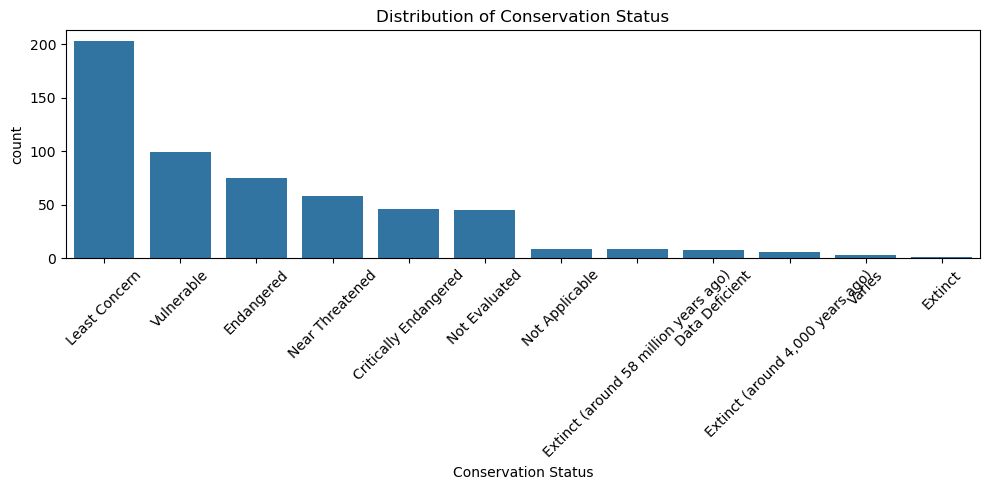

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_animals_exploded, x="Conservation Status", order=df_animals_exploded["Conservation Status"].value_counts().index)
plt.title("Distribution of Conservation Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The bar chart of Conservation Status shows that the majority of animals in the dataset are classified as “Least Concern.” Other categories like “Vulnerable” or “Endangered” are significantly less represented, while many statuses such as “Extinct” or “Not Evaluated” occur only a few times.

##### To reduce class imbalance and improve predictive performance, I engineered a binary feature, At_Risk, which combines all threatened categories under a single label. This enables more robust classification and supports clearer extinction risk analysis.

#### 2. **Countplot comparing offspring per birth between "At risk"/"Not at risk"**

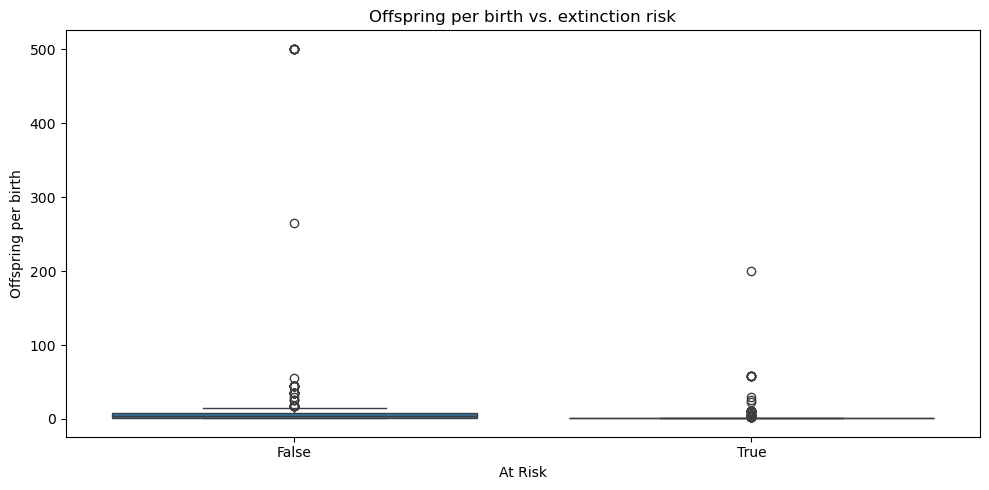

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_animals_exploded, x="At_Risk", y="Offspring per Birth")
plt.title("Offspring per birth vs. extinction risk")
plt.xlabel("At Risk")
plt.ylabel("Offspring per birth")
plt.tight_layout()
plt.show()

##### Comparing the at risk and the not at risk animals, we can see that the animals at risk actualy have fever offsprings than the ones that araen't at risk (we can see that by how the median is lower and the box is tighter near the bottom). As we can see there are massive outliers, which is to be expected from animals like turtles or frogs dropping hundreds of eggs. 

- This also supports my hypothesis **"Animals with low reproductive output are more vulnerable to extinction"**

#### 3. **Countplot: Diet vs. At_Risk**

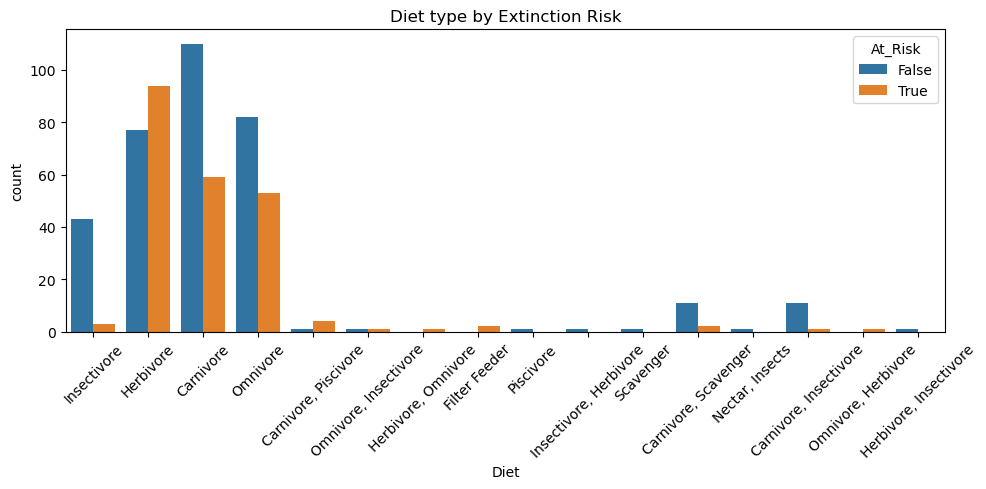

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_animals_exploded, x="Diet", hue="At_Risk")
plt.title("Diet type by Extinction Risk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### The plot comparing diet type to extinction risk reveals a clear pattern: carnivores are significantly more likely to be at risk than other diet groups. This supports the hypothesis that higher trophic levels (carnivores) face greater extinction vulnerability due to food chain dependencies and ecological specialization.
##### Omnivores and insectivores appear more resilient, while herbivores show a moderate distribution across risk levels. This insight suggests that diet is a key feature to retain when training predictive models.

#### 4. **Correlation Heatmap** (Numerical only)

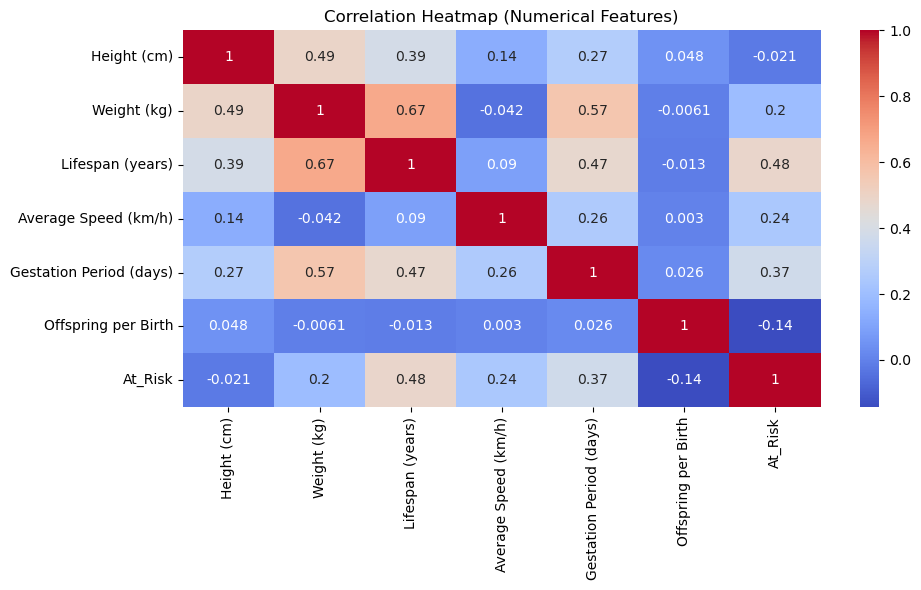

In [48]:
# Only select numeric columns
numeric_cols = df_animals_exploded.select_dtypes(include=["float64", "int64", "bool"])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

##### The correlation heatmap reveals several meaningful patterns in the data. Notably, there is a positive correlation between weight, lifespan, and gestation period — suggesting that larger animals live longer and reproduce slower. Additionally, species with longer gestation periods and lifespans are more likely to be at risk of extinction, while those with more offspring tend to be safer. These findings support the hypothesis that slow-reproducing animals are more vulnerable to extinction pressures.

#### 5. **Bar chart: Top 10 most represented animals**

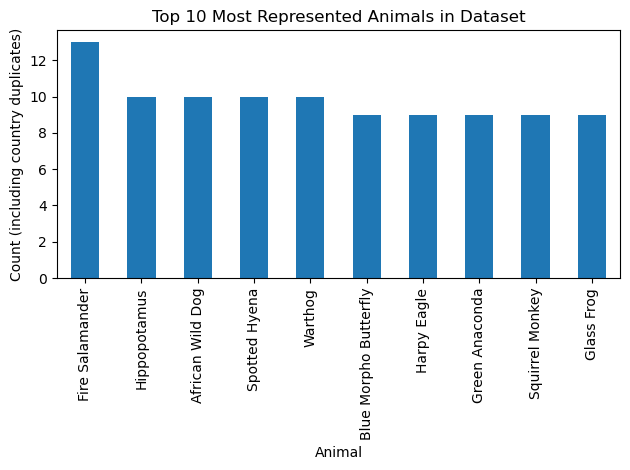

In [49]:
plt.Figure(figsize=(10, 5))
df_animals_exploded["Animal"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Represented Animals in Dataset")
plt.xlabel("Animal")
plt.ylabel("Count (including country duplicates)")
plt.tight_layout()
plt.show()

In [50]:
df_animals_exploded.to_csv("cleaned_animal_data.csv", index=False)
